In [1]:
import sys
import math
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt

from numcosmo_py import Nc, Ncm
from numcosmo_py.plotting.tools import set_rc_params_article

In [2]:
Ncm.cfg_init()

In [3]:
cosmo = Nc.HICosmoQGRW()
cosmo.props.w = 1.0e-5
cosmo.props.Omegar = 1.0 * (1.0e-5)
cosmo.props.Omegaw = 1.0 * (1.0 - 1.0e-5)
cosmo.props.xb = 1.0e30

k = 1.0
min_alpha_c = -120.0
max_alpha_c = -1.0
min_alpha_scale = 1.0e-12
np_plot = 1000

# Time arrays for the contraction and bounce phases

alpha_c = np.linspace(min_alpha_c, max_alpha_c, np_plot)
alpha_b_e = np.geomspace(min_alpha_scale, 2.0, np_plot)
alpha_b = np.concatenate((np.flip(-alpha_b_e), alpha_b_e))

# Computing background observables in the contraction phase

m_s_c = np.array([cosmo.eom_eval(alpha, k).m_s for alpha in alpha_c])
m_zeta_c = np.array([cosmo.eom_eval(alpha, k).m_zeta for alpha in alpha_c])
mnu2_s_c = np.array([cosmo.eom_eval(alpha, k).mnu2_s for alpha in alpha_c])
mnu2_zeta_c = np.array([cosmo.eom_eval(alpha, k).mnu2_zeta for alpha in alpha_c])
nu1_c = np.array([cosmo.eom_eval(alpha, k).nu1 for alpha in alpha_c])
nu2_c = np.array([cosmo.eom_eval(alpha, k).nu2 for alpha in alpha_c])
nu_s_c = np.sqrt(mnu2_s_c / m_s_c)
nu_zeta_c = np.sqrt(mnu2_zeta_c / m_zeta_c)
y_c = np.array([cosmo.eom_eval(alpha, k).y for alpha in alpha_c])
gamma11_c = np.array([cosmo.eom_eval(alpha, k).gammabar11 for alpha in alpha_c])
gamma22_c = np.array([cosmo.eom_eval(alpha, k).gammabar22 for alpha in alpha_c])
gamma12_c = np.array([cosmo.eom_eval(alpha, k).gammabar12 for alpha in alpha_c])
tau_c = np.array([cosmo.eom_eval(alpha, k).taubar for alpha in alpha_c])

# Computing background observables in the bounce phase

m_s_b = np.array([cosmo.eom_eval(alpha, k).m_s for alpha in alpha_b])
m_zeta_b = np.array([cosmo.eom_eval(alpha, k).m_zeta for alpha in alpha_b])
mnu2_s_b = np.array([cosmo.eom_eval(alpha, k).mnu2_s for alpha in alpha_b])
mnu2_zeta_b = np.array([cosmo.eom_eval(alpha, k).mnu2_zeta for alpha in alpha_b])
nu1_b = np.array([cosmo.eom_eval(alpha, k).nu1 for alpha in alpha_b])
nu2_b = np.array([cosmo.eom_eval(alpha, k).nu2 for alpha in alpha_b])
nu_s_b = np.sqrt(mnu2_s_b / m_s_b)
nu_zeta_b = np.sqrt(mnu2_zeta_b / m_zeta_b)
y_b = np.array([cosmo.eom_eval(alpha, k).y for alpha in alpha_b])
gamma11_b = np.array([cosmo.eom_eval(alpha, k).gammabar11 for alpha in alpha_b])
gamma22_b = np.array([cosmo.eom_eval(alpha, k).gammabar22 for alpha in alpha_b])
gamma12_b = np.array([cosmo.eom_eval(alpha, k).gammabar12 for alpha in alpha_b])
tau_b = np.array([cosmo.eom_eval(alpha, k).taubar for alpha in alpha_b])

cos2_phi_c = (nu1_c**2 * nu_zeta_c**2 - nu2_c**2 * nu_s_c**2) / (nu1_c**4 - nu2_c**4)
sin2_phi_c = (nu1_c**2 * nu_s_c**2 - nu2_c**2 * nu_zeta_c**2) / (nu1_c**4 - nu2_c**4)

cos2_phi_b = (nu1_b**2 * nu_zeta_b**2 - nu2_b**2 * nu_s_b**2) / (nu1_b**4 - nu2_b**4)
sin2_phi_b = (nu1_b**2 * nu_s_b**2 - nu2_b**2 * nu_zeta_b**2) / (nu1_b**4 - nu2_b**4)



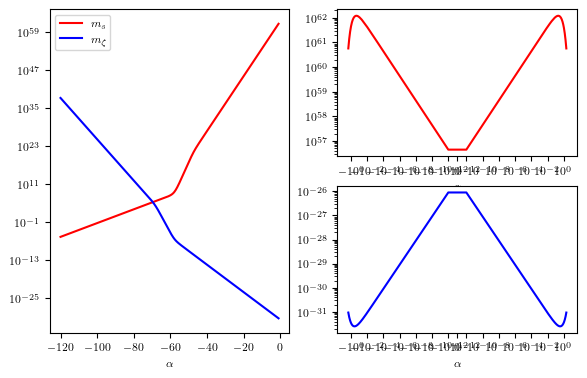

In [4]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,4)

ax1.plot(alpha_c, m_s_c, c='r', label=r'$m_s$')
ax1.plot(alpha_c, m_zeta_c, c='b', label=r'$m_\zeta$')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')

ax2.plot(alpha_b, m_s_b, c='r', label=r'$m_s$')
ax2.set_xscale('symlog', linthresh=min_alpha_scale)
ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')

ax3.plot(alpha_b, m_zeta_b, c='b', label=r'$m_\zeta$')
ax3.set_xscale('symlog', linthresh=min_alpha_scale)
ax3.set_yscale('log')
ax3.set_xlabel(r'$\alpha$')

ax1.legend()

pass

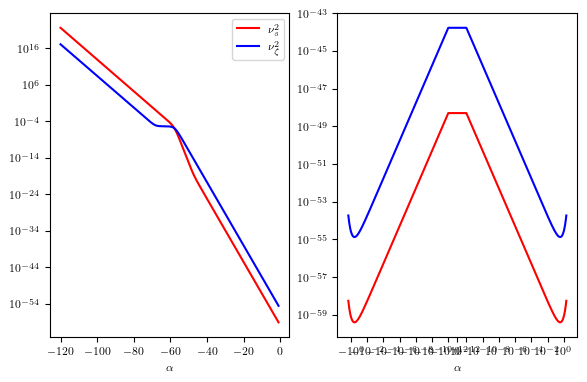

In [5]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c, mnu2_s_c / m_s_c, c='r', label=r'$\nu_s^2$')
ax1.plot(alpha_c, mnu2_zeta_c / m_zeta_c, c='b', label=r'$\nu_\zeta^2$')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_b, mnu2_s_b / m_s_b, c='r', label=r'$\nu_s^2$')
ax2.plot(alpha_b, mnu2_zeta_b / m_zeta_b, c='b', label=r'$\nu_\zeta^2$')
ax2.set_xscale('symlog', linthresh=min_alpha_scale)
ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')

pass

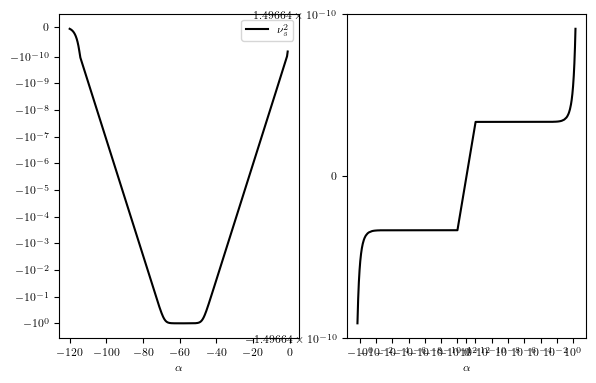

In [6]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c, y_c * np.sqrt(m_s_c * m_zeta_c), c='k', label=r'$\nu_s^2$')
ax1.set_yscale('symlog', linthresh=1.0e-10)
ax1.set_xlabel(r'$\alpha$')

ax2.plot(alpha_b, y_b * np.sqrt(m_s_b * m_zeta_b), c='k', label=r'$\nu_s^2$')
ax2.set_xscale('symlog', linthresh=min_alpha_scale)
ax2.set_yscale('symlog')
ax2.set_xlabel(r'$\alpha$')

ax1.legend()

pass

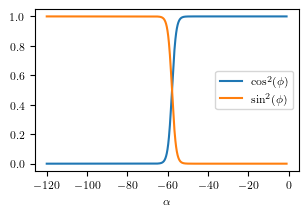

In [7]:
set_rc_params_article(ncol=1)
fig = plt.figure()

ax1= fig.add_subplot(1,1,1)

ax1.plot(alpha_c, cos2_phi_c, label=r'$\cos^2(\phi)$')
ax1.plot(alpha_c, sin2_phi_c, label=r'$\sin^2(\phi)$')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()
pass

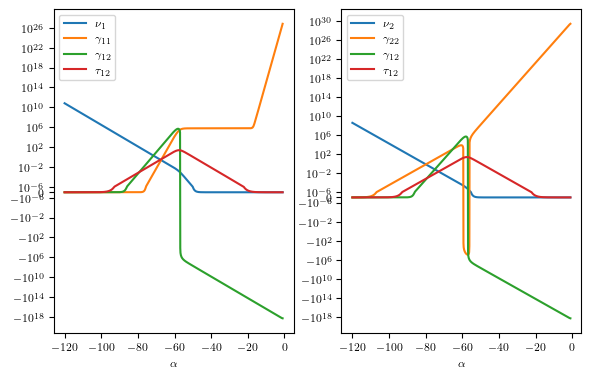

In [8]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_c, nu1_c, label=r'$\nu_1$')
ax1.plot(alpha_c, gamma11_c, label=r'$\gamma_{11}$')
ax1.plot(alpha_c, gamma12_c, label=r'$\gamma_{12}$')
ax1.plot(alpha_c, tau_c, label=r'$\tau_{12}$')

ax1.set_yscale('symlog', linthresh=1.0e-6)
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_c, nu2_c, label=r'$\nu_2$')
ax2.plot(alpha_c, gamma22_c, label=r'$\gamma_{22}$')
ax2.plot(alpha_c, gamma12_c, label=r'$\gamma_{12}$')
ax2.plot(alpha_c, tau_c, label=r'$\tau_{12}$')

ax2.set_yscale('symlog', linthresh=1.0e-6)
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

pass

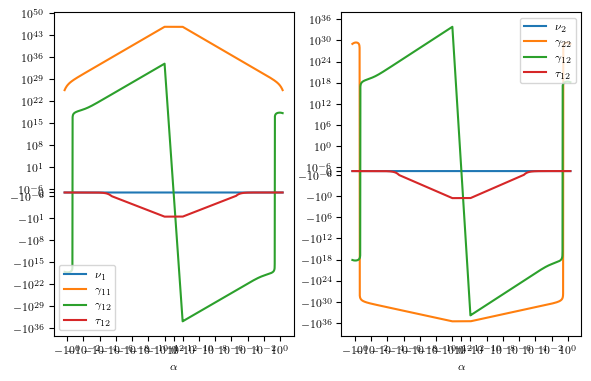

In [9]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(alpha_b, nu1_b, label=r'$\nu_1$')
ax1.plot(alpha_b, gamma11_b, label=r'$\gamma_{11}$')
ax1.plot(alpha_b, gamma12_b, label=r'$\gamma_{12}$')
ax1.plot(alpha_b, tau_b, label=r'$\tau_{12}$')
ax1.set_xscale('symlog', linthresh=min_alpha_scale)
ax1.set_yscale('symlog', linthresh=1.0e-6)
ax1.set_xlabel(r'$\alpha$')

ax1.legend()

ax2.plot(alpha_b, nu2_b, label=r'$\nu_2$')
ax2.plot(alpha_b, gamma22_b, label=r'$\gamma_{22}$')
ax2.plot(alpha_b, gamma12_b, label=r'$\gamma_{12}$')
ax2.plot(alpha_b, tau_b, label=r'$\tau_{12}$')
ax2.set_xscale('symlog', linthresh=min_alpha_scale)
ax2.set_yscale('symlog', linthresh=1.0e-6)
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

pass

In [10]:
def get_zeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.ZETA_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.ZETA_I)

def get_S(v):
    return v.get(Nc.HIPertITwoFluidsVars.S_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.S_I)

def get_Pzeta(v):
    return v.get(Nc.HIPertITwoFluidsVars.PZETA_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.PZETA_I)

def get_PS(v):
    return v.get(Nc.HIPertITwoFluidsVars.PS_R) + 1.0j * v.get(Nc.HIPertITwoFluidsVars.PS_I)


In [30]:
%%time

def spec_params(Omegars = 1.0e-5, w = 1.0e-3, E0 = 1.0):
    cosmo.props.w = w
    cosmo.props.Omegar = E0 * Omegars
    cosmo.props.Omegaw = E0 * (1.0 - Omegars)
    
    pert = Nc.HIPertTwoFluids.new()
    pert.props.reltol = 1.0e-9
    
    spec1 = pert.compute_zeta_spectrum(cosmo, 1, -cosmo.abs_alpha(1.0e-14), -1.0, 1.0e-3, 1.0e14, 100)
    spec2 = pert.compute_zeta_spectrum(cosmo, 2, -cosmo.abs_alpha(1.0e-14), -1.0, 1.0e-3, 1.0e14, 100)

    return spec1, spec2

specs1 = []
specs2 = []
for Omegars in np.geomspace(1.0e-2, 1.0e-8, 10):
#for E0 in np.geomspace(1.0e-1, 1.0e1, 10):
    
    spec1, spec2 = spec_params(Omegars, 1.0e-5, 1.0)
    specs1.append(spec1)
    specs2.append(spec2)


CPU times: user 1min 36s, sys: 109 ms, total: 1min 36s
Wall time: 1min 37s


134.57836099164655 3.000000006559785
141.52141095439333 2.0000300099855415
134.57836114168347 3.000000000960305
142.2968566197709 2.0000299868417066
134.57836097984554 3.00000000632813
143.06610105865937 2.00002997116096
134.57836014857665 3.0000000340371296
143.83401935805443 2.000029878833156
134.57835645181956 3.000000157285378
144.6016525115409 2.0000297711644537
134.57834224436107 3.000000630514608
145.36922825485252 2.00002952780053
134.57831375726963 3.000001575271915
146.13680167873076 2.000028915218776
134.57831642529098 3.000001467599617
146.9043920037454 2.000027652723656
134.5783181026893 3.000001390309717
147.67202561358476 2.0000249393415572
134.57832747686788 3.000001051688091
148.43975348446267 2.0000191058865715


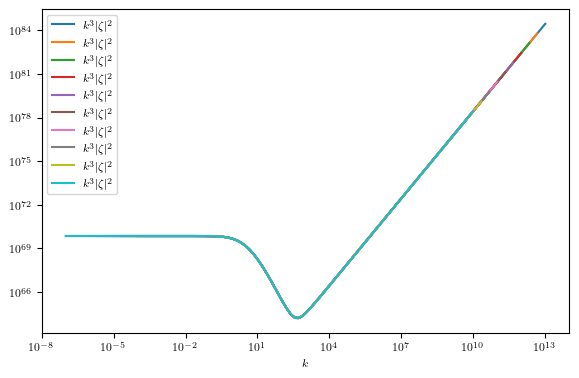

In [33]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(1,1,1)

for spec1, spec2, Omegar in zip(specs1, specs2, np.geomspace(1.0e-2, 1.0e-8, 10)):

    lnk_a1 = np.array(spec1.peek_xv().dup_array())
    lnPk_a1 = np.array(spec1.peek_yv().dup_array())
    
    lnk_a2 = np.array(spec2.peek_xv().dup_array())
    lnPk_a2 = np.array(spec2.peek_yv().dup_array())
    
    b1, a1 = np.polyfit(lnk_a1[-20:], lnPk_a1[-20:], 1)
    print(a1, b1 + 1)
    
    b2, a2 = np.polyfit(lnk_a2[-20:], lnPk_a2[-20:], 1)
    print(a2, b2 + 1)
    
    #ax1.plot(np.exp(lnk_a1), np.exp(lnPk_a1), label=r'$k^3|\zeta_1|^2$')
    #ax1.plot(np.exp(lnk_a1), np.exp(a1 + b1 * lnk_a1), label=r'Poly: $k^3|\zeta_1|^2$')
    
    #ax1.plot(np.exp(lnk_a2), np.exp(lnPk_a2), label=r'$k^3|\zeta_2|^2$')
    #ax1.plot(np.exp(lnk_a2), np.exp(a2 + b2 * lnk_a2), label=r'Poly: $k^3|\zeta_2|^2$')
    
    ax1.plot(np.exp(lnk_a2)*Omegar**(1/2), (np.exp(lnPk_a2) + np.exp([spec1.eval(lnk) for lnk in lnk_a2]))*Omegar, label=r'$k^3|\zeta|^2$')
    #ax1.plot(np.exp(lnk_a2)*E0**(-1/2), (np.exp(lnPk_a2) + np.exp([spec1.eval(lnk) for lnk in lnk_a2]))*E0**(-1), label=r'$k^3|\zeta|^2$')
    #ax1.plot(np.exp(lnk_a2), (np.exp(lnPk_a2) + np.exp([spec1.eval(lnk) for lnk in lnk_a2])), label=r'$k^3|\zeta|^2$')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$k$')
ax1.legend()

pass



In [83]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=300,  # < Increase me for better results
    binary_operators=["+", "-", "*", "/"],
    unary_operators=[
        "tanh",        
    ],
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
    populations = 60,
)


In [84]:
model.fit(lnk_a2.reshape(-1,1), lnPk_a2)

/home/sandro/.local/lib/python3.11/site-packages/pysr/sr.py:1281: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(



Expressions evaluated per second: 5.940e+05
Head worker occupation: 11.2%
Progress: 1186 / 18000 total iterations (6.589%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.217e+01  1.594e+01  y = 179.58
4           3.830e+01  3.210e-02  y = (180.23 - tanh(x₀))
5           2.219e+01  5.457e-01  y = ((-0.39161 * x₀) - -184.54)
7           2.219e+01  1.490e-07  y = (184.54 + (-0.19581 * (x₀ + x₀)))
9           2.212e+01  1.662e-03  y = (((785.47 / (-2005.8 - x₀)) * x₀) - -184.54)
10          8.285e+00  9.819e-01  y = (179.56 + (tanh((2.3223 / 0.182) - x₀) / 0.1674))
12          8.184e+00  6.158e-03  y = (179.54 + (tanh(((2.3223 / 0.182) - x₀) * 0.68639) / 0.167...
                                  4))
13          8.178e+00  7.094e-04  y = (179.54 + (tanh(((2.3223 / 0.182) - x₀) * 0.68639) / tanh(...
                                  0.1674)))
14          8.065e+00  1.3

[ Info: Started!


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                           179.5845   
	1         3.209774e-02                             (180.22537 - tanh(x0))   
	2         5.457020e-01                  ((-0.39166483 * x0) - -184.54474)   
	3         4.506454e-08             ((0.60839283 * x0) - (x0 - 184.54402))   
	4         9.851865e-01     (179.55518 + (tanh(12.761697 - x0) * 5.97393))   
	5         6.878725e-03  (179.58165 + (tanh((12.67312 - x0) * 0.6724680...   
	6         5.337357e-02  (171.31406 + (tanh(tanh(15.395343 - x0)) * (21...   
	7         5.594758e-01  (175.17535 + (tanh(14.175411 - x0) * (11.22903...   
	8         3.709056e-02  (169.95616 + (tanh(15.848622 - x0) * (20.68860...   
	9         4.994208e-01  (172.24475 + (tanh(15.065756 - x0) * (17.05391...   
	10        8.544651e-02  (173.39519 + (tanh(14.70492 - x0) * (15.266392...   
	11  >>>>  8.171071e-01  (172.24475 + (tanh(15.010006 - x0) * (15.01000...   
	12        1.408766e-02  (172.24475 + (tanh(15.065757 - x0) * (15.06575...   
	13        1.660253e-01  (172.24475 + (tanh(15.065757 - x0) * (15.06575...   
	14        1.504349e-01  (172.24477 + (tanh((15.149901 - x0) * 0.365321...   
	
	         loss  complexity  
	0   42.167710           1  
	1   38.296616           4  
	2   22.190395           5  
	3   22.190393           7  
	4    8.285218           8  
	5    8.172015          10  
	6    7.747281          11  
	7    4.427638          12  
	8    4.266422          13  
	9    2.589215          14  
	10   2.377164          15  
	11   1.050012          16  
	12   1.035323          17  
	13   0.876944          18  
	14   0.754465          19  
]

.229 - (0.4...
                                  0177 * x₀))))
15          2.377e+00  5.680e-01  y = (173.4 + (tanh(14.702 - x₀) * (15.274 - (tanh(tanh(tanh(x₀...
                                  ))) * x₀))))
17          2.352e+00  5.418e-03  y = (173.4 + (tanh(14.702 - x₀) * (15.274 - (tanh(tanh(tanh(x₀...
                                   + x₀))) * x₀))))
19          1.607e+00  1.903e-01  y = ((178.94 + (tanh((tanh((12.377 - x₀) * 0.39528) / 0.19774)...
                                   + (0.17757 * x₀)) / 0.12996)) - 1.5548)
20          1.596e+00  6.797e-03  y = ((178.94 + (tanh((tanh((12.377 - x₀) * 0.39528) / 0.19774)...
                                   + (0.17757 * x₀)) / tanh(0.12996))) - 1.5548)
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 5.250e+05
Head worker occupation: 12.6%
Progress: 17491 / 18000 total iterations (97.172%)
Hall

In [86]:
model

PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                           179.5845   
	1         3.209774e-02                             (180.22537 - tanh(x0))   
	2         5.457020e-01                  ((-0.39166483 * x0) - -184.54474)   
	3         4.506454e-08             ((0.60839283 * x0) - (x0 - 184.54402))   
	4         9.851865e-01     (179.55518 + (tanh(12.761697 - x0) * 5.97393))   
	5         6.878725e-03  (179.58165 + (tanh((12.67312 - x0) * 0.6724680...   
	6         5.337357e-02  (171.31406 + (tanh(tanh(15.395343 - x0)) * (21...   
	7         5.594758e-01  (175.17535 + (tanh(14.175411 - x0) * (11.22903...   
	8         3.709056e-02  (169.95616 + (tanh(15.848622 - x0) * (20.68860...   
	9         4.994208e-01  (172.24475 + (tanh(15.065756 - x0) * (17.05391...   
	10        8.544651e-02  (173.39519 + (tanh(14.70492 - x0) * (15.266392...   
	11  >>>>  8.171071e-01  (172.24475 + (tanh(15.010006 - x0) * (15.01000...   
	12        1.408766e-02  (172.24475 + (tanh(15.065757 - x0) * (15.06575...   
	13        1.660253e-01  (172.24475 + (tanh(15.065757 - x0) * (15.06575...   
	14        1.504349e-01  (172.24477 + (tanh((15.149901 - x0) * 0.365321...   
	
	         loss  complexity  
	0   42.167710           1  
	1   38.296616           4  
	2   22.190395           5  
	3   22.190393           7  
	4    8.285218           8  
	5    8.172015          10  
	6    7.747281          11  
	7    4.427638          12  
	8    4.266422          13  
	9    2.589215          14  
	10   2.377164          15  
	11   1.050012          16  
	12   1.035323          17  
	13   0.876944          18  
	14   0.754465          19  
]

In [87]:
model.equations.iloc[11]['equation']

/home/sandro/.local/lib/python3.11/site-packages/pysr/sr.py:1121: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


'(172.24475 + (tanh(15.010006 - x0) * (15.010006 - (tanh(tanh(0.051303983 * x0)) * x0))))'

In [11]:
def integrate_system(k):
    # Defining relative tolerance for integration
    prec = 1.0e-10
    # Ratio potential frequency to define cross time
    cross_size = 1.0e-9
    
    # New perturbations object
    pert1 = Nc.HIPertTwoFluids.new()
    pert2 = Nc.HIPertTwoFluids.new()
    # Setting reltol
    pert1.props.reltol = prec
    pert2.props.reltol = prec
    # Setting k
    pert1.set_mode_k(k)
    pert2.set_mode_k(k)
    
    # Choose an initial condition
    alpha_try = -cosmo.abs_alpha(1.0e-14 * k**2)
    
    # New vector to store initial conditions 
    # 8 dimensional (Q_1, Q_2, P_1, P_2), real and imaginary parts
    ci1 = Ncm.Vector.new(8)
    ci2 = Ncm.Vector.new(8)
    
    alphai1 = pert1.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, cross_size)
    alphai2 = pert2.get_cross_time(cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try, cross_size)
    
    # Compute initial conditions at alpha_try store at ci and use normalization factor
    # pi/4
    pert1.get_init_cond_zetaS(cosmo, alphai1, 1, 0.25 * math.pi, ci1)
    pert2.get_init_cond_zetaS(cosmo, alphai2, 2, 0.25 * math.pi, ci2)
    
    # Use the previously computed initial conditions to start the system at alpha_try
    pert1.set_init_cond(cosmo, alphai1, 30, False, ci1)
    pert2.set_init_cond(cosmo, alphai2, 30, False, ci2)
    # print(f"Setting initial conditions for zeta1 and S1 at {alphai1}")
    # print(f"Setting initial conditions for zeta2 and S2 at {alphai2}")
    
    if alphai2 > alphai1:
        pert1.evolve(cosmo, alphai2)
        ci1, _ = pert1.peek_state(cosmo)
    else:
        pert2.evolve(cosmo, alphai1)
        ci2, _ = pert2.peek_state(cosmo)
    
    alphai = max(alphai1, alphai2)
    
    # Create a array of times to integrate the system over
    alpha_evol = np.linspace(alphai, -1.0e-1, 1000)
    
    # Integrate the system by stepping through alpha_evol using .evolve
    zeta1_a = [get_zeta(ci1)]
    S1_a = [get_S(ci1)]
    Pzeta1_a = [get_Pzeta(ci1)]
    PS1_a = [get_PS(ci1)]
    
    zeta2_a = [get_zeta(ci2)]
    S2_a = [get_S(ci2)]
    Pzeta2_a = [get_Pzeta(ci2)]
    PS2_a = [get_PS(ci2)]
    
    for alpha in tqdm(alpha_evol[1:], desc="Time evolution", position=1, leave=False):
        pert1.evolve(cosmo, alpha)
        pert2.evolve(cosmo, alpha)
        v1, _alphac1 = pert1.peek_state(cosmo)
        v2, _alphac2 = pert2.peek_state(cosmo)
    
        zeta1_a.append(get_zeta(v1))
        S1_a.append(get_S(v1))
        Pzeta1_a.append(get_Pzeta(v1))
        PS1_a.append(get_PS(v1))
    
        zeta2_a.append(get_zeta(v2))
        S2_a.append(get_S(v2))
        Pzeta2_a.append(get_Pzeta(v2))
        PS2_a.append(get_PS(v2))
    
    zeta1 = np.array(zeta1_a)
    S1 = np.array(S1_a)
    Pzeta1 = np.array(Pzeta1_a)
    PS1 = np.array(PS1_a)
    
    zeta2 = np.array(zeta2_a)
    S2 = np.array(S2_a)
    Pzeta2 = np.array(Pzeta2_a)
    PS2 = np.array(PS2_a)

    return (alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2)


In [12]:
alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2 = integrate_system(1.0)


Time evolution:   0%|                                                                                                                                                                                                 | 0/999 [00:00<?, ?it/s]
                                                                                                                                                                                                                                              

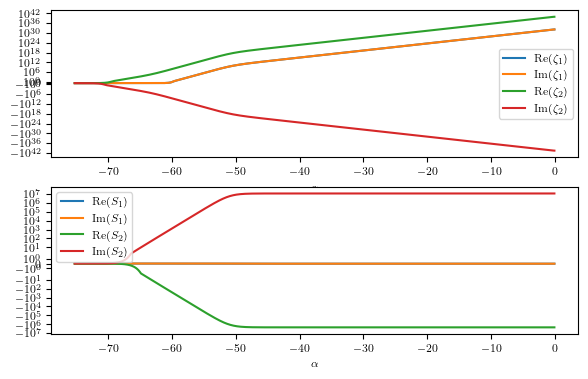

In [13]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

ax1.plot(alpha_evol, np.real(zeta1), label=r'$\mathrm{Re}(\zeta_1)$')
ax1.plot(alpha_evol, np.imag(zeta1), label=r'$\mathrm{Im}(\zeta_1)$')
ax1.plot(alpha_evol, np.real(zeta2), label=r'$\mathrm{Re}(\zeta_2)$')
ax1.plot(alpha_evol, np.imag(zeta2), label=r'$\mathrm{Im}(\zeta_2)$')
ax1.set_yscale('symlog')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_evol, np.real(S1), label=r'$\mathrm{Re}(S_1)$')
ax2.plot(alpha_evol, np.imag(S1), label=r'$\mathrm{Im}(S_1)$')
ax2.plot(alpha_evol, np.real(S2), label=r'$\mathrm{Re}(S_2)$')
ax2.plot(alpha_evol, np.imag(S2), label=r'$\mathrm{Im}(S_2)$')
ax2.set_yscale('symlog')
ax2.set_xlabel(r'$\alpha$')
ax2.legend()


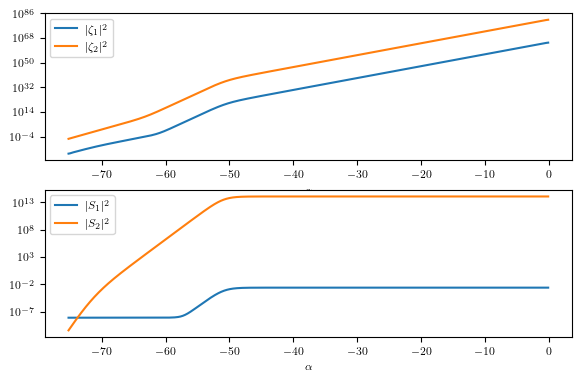

In [14]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

ax1.plot(alpha_evol, np.abs(zeta1)**2, label=r'$|\zeta_1|^2$')
ax1.plot(alpha_evol, np.abs(zeta2)**2, label=r'$|\zeta_2|^2$')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()

ax2.plot(alpha_evol, np.abs(S1)**2, label=r'$|S_1|^2$')
ax2.plot(alpha_evol, np.abs(S2)**2, label=r'$|S_2|^2$')
ax2.set_yscale('log')
ax2.set_xlabel(r'$\alpha$')
ax2.legend()

pass

In [15]:
k_a = np.geomspace(1.0e-3, 1.0e3, 100)

PI_zeta1 = []
PI_zeta2 = []
PI_S1 = []
PI_S2 = []

for k in tqdm(k_a, desc= "Mode evolution", position=0):
    alpha_evol, zeta1, S1, Pzeta1, PS1, zeta2, S2, Pzeta2, PS2 = integrate_system(k)
    PI_zeta1.append(np.abs(zeta1[-1])**2)
    PI_zeta2.append(np.abs(zeta2[-1])**2)
    PI_S1.append(np.abs(S1[-1])**2)
    PI_S2.append(np.abs(S2[-1])**2)

Mode evolution: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [45:12<00:00, 27.12s/it]


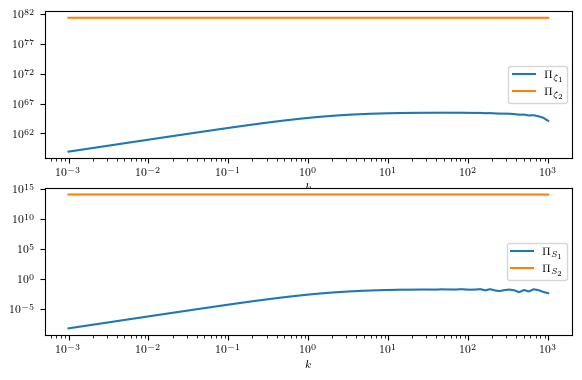

In [16]:
set_rc_params_article(ncol=2)
fig = plt.figure()

ax1= fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

ax1.plot(k_a, k_a**3 * PI_zeta1, label=r'$\Pi_{\zeta_1}$')
ax1.plot(k_a, k_a**3 * PI_zeta2, label=r'$\Pi_{\zeta_2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$k$')
ax1.legend()

ax2.plot(k_a, k_a**3 * PI_S1, label=r'$\Pi_{S_1}$')
ax2.plot(k_a, k_a**3 * PI_S2, label=r'$\Pi_{S_2}$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$k$')
ax2.legend()

pass

In [18]:
print(np.polyfit(np.log(k_a),np.log(k_a**3 * PI_zeta2),1)[0])

print(1.0 + 12.0 * cosmo.props.w / (1.0 + 3.0 *cosmo.props.w))


-0.00017585144466178716
1.000011999964


In [26]:
def test_two_fluids_wkb_mode(mode: int = Nc.HIPertTwoFluidsCross.MODE1SUB, case_f: int = 1, nullr = 1.0, nulli = 1.0) -> None:
    """Compute WKB approximation for the two-fluids model."""

    #
    #  New homogeneous and isotropic cosmological model NcHICosmoQGRW
    #
    cosmo = Nc.HICosmoQGRW()

    w = 0.00001
    prec = 1.0e-6
    mode_k = 1000

    cosmo.props.w = w
    cosmo.props.Omegar = 2.0 * (1.0e-8)
    cosmo.props.Omegaw = 2.0 * (1.0 - 1.0e-8)
    cosmo.props.xb = 1.0e30
    
    pert = Nc.HIPertTwoFluids.new()

    pert.props.reltol = prec
    pert.set_mode_k(mode_k)

    cross_size = 1.0e-5
    alpha_try = -cosmo.abs_alpha(1.0e-12 * mode_k**2)
    # Chuta tempo incial e depois calcula ele aqui embaixo, dependendo de qual modo é o main
    
    # Pra descobrir se o alpha1 da outra funcao faz sentido, coloca auqi o caso que vc quiser e imprime o tempo calcualdo (ex: mode1main, da um alpha 1.0e-9. Por isso ele deve ter colocado na 2 funçao)
    if mode == Nc.HIPertTwoFluidsCross.MODE1MAIN:
        alphai = pert.get_cross_time(
            cosmo, Nc.HIPertTwoFluidsCross.MODE1MAIN, alpha_try, cross_size
        )
    elif mode == Nc.HIPertTwoFluidsCross.MODE1SUB:
        alphai = pert.get_cross_time(
            cosmo, Nc.HIPertTwoFluidsCross.MODE1SUB, alpha_try, cross_size
        )
    elif mode == Nc.HIPertTwoFluidsCross.MODE2MAIN:
        alphai = pert.get_cross_time(
            cosmo, Nc.HIPertTwoFluidsCross.MODE2MAIN, alpha_try, cross_size
        )
    elif mode == Nc.HIPertTwoFluidsCross.MODE2SUB:
        alphai = pert.get_cross_time(
            cosmo, Nc.HIPertTwoFluidsCross.MODE2SUB, alpha_try, cross_size
        )
    else:
        raise ValueError("Invalid mode")

    alphaf = +cosmo.abs_alpha(1.0e20)

    print(f"Mode k = mode_k: {mode_k}")

    pert.set_stiff_solver(True)

    alpha_a = []
    gammabar11_a = []
    gammabar22_a = []
    gammabar12_a = []
    taubar12_a = []
    nu1_a = []
    nu2_a = []

    for alpha in np.linspace(alphai, alphaf, 10000):
        eom = pert.eom(cosmo, alpha)
        alpha_a.append(alpha)

        gammabar11_a.append(math.fabs(eom.gammabar11))
        gammabar22_a.append(math.fabs(eom.gammabar22))
        gammabar12_a.append(math.fabs(eom.gammabar12))
        taubar12_a.append(math.fabs(eom.taubar))
        nu1_a.append(eom.nu1)
        nu2_a.append(eom.nu2)

    print(
        f"# Calculating mode 1, initial time {alphai}, redshift_alpha {cosmo.x_alpha(alphai):8.2e}]: "
    )

    ci = Ncm.Vector.new(8)

    pert.get_init_cond_zetaS(cosmo, alphai, case_f, 0.25 * math.pi, ci)
    pert.set_init_cond(cosmo, alphai, 3, False, ci)

    Ps_zeta1 = []
    Ps_S1 = []
    Ps_Pzeta1 = []
    Ps_PS1 = []

    Ps_zeta1.append(
        math.hypot(
            nullr * ci.get(Nc.HIPertITwoFluidsVars.ZETA_R),
            nulli * ci.get(Nc.HIPertITwoFluidsVars.ZETA_I),
        )
        ** 2
    )
    Ps_S1.append(
        math.hypot(
            nullr *ci.get(Nc.HIPertITwoFluidsVars.S_R),
            nulli *ci.get(Nc.HIPertITwoFluidsVars.S_I),
        )
        ** 2
    )
    Ps_Pzeta1.append(
        math.hypot(
            nullr *ci.get(Nc.HIPertITwoFluidsVars.PZETA_R),
            nulli *ci.get(Nc.HIPertITwoFluidsVars.PZETA_I),
        )
        ** 2
    )
    Ps_PS1.append(
        math.hypot(
           nullr * ci.get(Nc.HIPertITwoFluidsVars.PS_R),
           nulli * ci.get(Nc.HIPertITwoFluidsVars.PS_I),
        )
        ** 2
    )

    for alpha in tqdm(alpha_a[1:]):
        # for alpha in alpha_a[1:]:
        pert.evolve(cosmo, alpha)
        v, _alphac = pert.peek_state(cosmo)
        Ps_zeta1.append(
            math.hypot(
              nullr *  v.get(Nc.HIPertITwoFluidsVars.ZETA_R),
              nulli *  v.get(Nc.HIPertITwoFluidsVars.ZETA_I),
            )
            ** 2
        )
        Ps_S1.append(
            math.hypot(
               nullr * v.get(Nc.HIPertITwoFluidsVars.S_R),
              nulli *  v.get(Nc.HIPertITwoFluidsVars.S_I),
            )
            ** 2
        )
        Ps_Pzeta1.append(
            math.hypot(
              nullr *  v.get(Nc.HIPertITwoFluidsVars.PZETA_R),
              nulli *  v.get(Nc.HIPertITwoFluidsVars.PZETA_I),
            )
            ** 2
        )
        Ps_PS1.append(
           math.hypot(
              nullr *  v.get(Nc.HIPertITwoFluidsVars.PS_R),
             nulli *   v.get(Nc.HIPertITwoFluidsVars.PS_I),
            )
            ** 2
        )                                                                               
    plt.plot(alpha_a, Ps_zeta1, label=r"$P_\zeta$")
    plt.plot(alpha_a, Ps_S1, label=r"$P_Q$")
    plt.plot(alpha_a, Ps_Pzeta1, label=r"$P_{P_\zeta}$")
    plt.plot(alpha_a, Ps_PS1, label=r"$P_{P_Q}$")
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"Mode")
    plt.grid()
    plt.legend(loc="upper left")
    # plt.xscale('log')
    plt.yscale("log")

    Delta_zeta1 = (
        mode_k**3 * Ps_zeta1.pop() / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
    )
    Delta_S1 = mode_k**3 * Ps_S1.pop() / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
    Delta_Pzeta1 = (
        mode_k**3 * Ps_Pzeta1.pop() / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
    )
    Delta_PS1 = (
        mode_k**3 * Ps_PS1.pop() / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
    )
    print(
        f"# Final values k = {mode_k: 20.15g} Ps_zeta{case_f} = {Delta_zeta1: 21.15e} "
        f"Ps_Pzeta{case_f} = {Delta_Pzeta1: 21.15e} Ps_S{case_f} = {Delta_S1: 21.15e} "
        f"Ps_PS{case_f} = {Delta_PS1: 21.15e}"
            )


 
    #plt.savefig('mode_I_p_R')
    #plt.clf()
    plt.show()

In [5]:
def test_two_fluids_wkb_spec() -> None:
    """Compute WKB approximation for the two-fluids model spectrum."""

    #
    #  New homogeneous and isotropic cosmological model NcHICosmoQGRW
    #
    cosmo = Nc.HICosmoQGRW() # P1 = Cosmologia 

    w = 1.0e-5 #P2 eq de estado da materia escura
    prec = 1.0e-7

    #P3 densidade de radiação e materia escura e energia escura (1 - resto)
    cosmo.props.w = w
    cosmo.props.Omegar = (1.0e-8) * 1.0
    cosmo.props.Omegaw = (1.0 - 1.0e-8) * 1.0
    cosmo.props.xb = 1.0e30 # P4 x do bounce

    pert = Nc.HIPertTwoFluids.new()

    pert.props.reltol = prec
    # pert.set_stiff_solver (True)

    # k = 1 => lambda = 5 Gpc
    # k = 10^5 => lambda = 50 kpc
    lnki = math.log(1.0e0)# P5 intervalo de momento de interesse
    lnkf = math.log(1.0e5)
    lnk_a = np.linspace(lnki, lnkf, 20)

    ci = Ncm.Vector.new(8)

    k_a = []
    Ps_zeta1 = []
    Ps_S1 = []
    Ps_zeta2 = []
    Ps_S2 = []
    Ps_Pzeta1 = []
    Ps_PS1 = []

    out_file = open("twofluids_spectrum_{w}.dat", "w", encoding="utf-8")
#alpha is related to the time variable. The log-redshift time
    start_alpha1 = 1.0e-10 # P5 tempo inicial dependente do redshift.
    start_alpha2 = 1.0e-14

    for lnk in tqdm(lnk_a):
        k = math.exp(lnk)
        pert.set_mode_k(k)
        k_a.append(k)

        alphaf = cosmo.abs_alpha(1.0e20)

        # print ("# Evolving mode %e from %f to %f" % (k, alphai, alphaf))
        #S is our variable Q.
        alphai = -cosmo.abs_alpha(start_alpha1 * k**2)
        
        #### Ate aqui só coloca todos os parametros, define o tempo inicial, e converte o alpha1 em algum tipo de numero absoluto nessa funçao de cima.
        
        ##### Agora embaixo, calcula as cond iniciais, seta as condicioes iniciais e evolui no tempo. 
        
        pert.get_init_cond_zetaS(cosmo, alphai, 1, 0.25 * math.pi, ci)
#This function does the following: Calls get_init_cond_zetaS, which calls cond_QP.
#IN cond_QP:
        #Starts interface that have the equations of motion and the decomposition TV.
        #Defines which case: 1 or 2, defining which momentum we assume as non-zero
        #Computes all the init cond
        #I believe that R and I represents each solutioon 1 and 2.
#Then we call to_zetaS, which changes from QP to zeta Q
        pert.set_init_cond(cosmo, alphai, 1, False, ci)

        print(f"# Mode 1 k {k: 21.15e}, state module {pert.get_state_mod():f}")

        pert.evolve(cosmo, alphaf)#Evolve the system untill alphaF
        
        
        
        v, _alphac = pert.peek_state(cosmo)#Get the current time and values of the numerical solution for the modes. V é o vetor com os modos, n sei a ordem
#I believe that Delta represents the spectrum here.


##Aqui terminou de calcular os modos pro momento do loop. Ai agora calcula o espectro
        Delta_zeta1 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.ZETA_R),
                v.get(Nc.HIPertITwoFluidsVars.ZETA_I),
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_S1 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.S_R), v.get(Nc.HIPertITwoFluidsVars.S_I)
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_Pzeta1 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.PZETA_R),
                v.get(Nc.HIPertITwoFluidsVars.PZETA_I),
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_PS1 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.PS_R), v.get(Nc.HIPertITwoFluidsVars.PS_I)
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )

        Ps_zeta1.append(Delta_zeta1)
        Ps_S1.append(Delta_S1)
        Ps_Pzeta1.append(Delta_Pzeta1)
        Ps_PS1.append(Delta_PS1)

        
        #### Aqui acabou o espectro pro modo 1. Ai faz de novo pro modo 2. ####3
        
        alphai = -cosmo.abs_alpha(start_alpha2 * k**2)
        pert.get_init_cond_zetaS(cosmo, alphai, 2, 0.25 * math.pi, ci)
        pert.set_init_cond(cosmo, alphai, 0, False, ci)

        pert.evolve(cosmo, alphaf)
        v, _alphac = pert.peek_state(cosmo)
        print(_alphac)
        Delta_zeta2 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.ZETA_R),
                v.get(Nc.HIPertITwoFluidsVars.ZETA_I),
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_S2 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.S_R), v.get(Nc.HIPertITwoFluidsVars.S_I)
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_Pzeta2 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.PZETA_R),
                v.get(Nc.HIPertITwoFluidsVars.PZETA_I),
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_PS2 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.PS_R), v.get(Nc.HIPertITwoFluidsVars.PS_I)
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )

        Ps_zeta2.append(Delta_zeta2)
        Ps_S2.append(Delta_S2)
        Ps_zeta2.append(Delta_Pzeta2)
        Ps_S2.append(Delta_PS2)

        out_file.write(
            f"{k: 20.15e} {Delta_zeta1: 20.15e} {Delta_zeta2: 20.15e} {Delta_S1: 20.15e} "
            f"{Delta_S2: 20.15e} {Delta_Pzeta1: 20.15e} {Delta_Pzeta2: 20.15e} "
            f"{Delta_PS1: 20.15e} {Delta_PS2: 20.15e}\n"
        )
        out_file.flush()

    out_file.close()
    
###Plot

    plt.plot(k_a, Ps_zeta1, label=r"$P_\zeta$")
    plt.plot(k_a, Ps_S1, label=r"$P_Q$")
    #plt.plot(k_a, Ps_zeta2, label=r"$P^2_\zeta$")
   # plt.plot(k_a, Ps_S2, label=r"$P^2_Q$")
    plt.xlabel(r"$k $")
    plt.ylabel(r"$Spectrum$")
    plt.grid()
    plt.legend(loc="upper left")
    #plt.xscale("log")
    #plt.yscale("log")


    plt.savefig('spec')
    plt.show()

In [6]:
def test_two_fluids_wkb_spec_log() -> None:
    """Compute WKB approximation for the two-fluids model spectrum."""

    #
    #  New homogeneous and isotropic cosmological model NcHICosmoQGRW
    #
    cosmo = Nc.HICosmoQGRW() # P1 = Cosmologia 

    w = 0.00001 #P2 eq de estado da materia escura
    prec = 1.0e-7

    #P3 densidade de radiação e materia escura e energia escura (1 - resto)
    cosmo.props.w = w
    cosmo.props.Omegar = (1.0e-8) * 1.0
    cosmo.props.Omegaw = (1.0 - 1.0e-8) * 1.0
    cosmo.props.xb = 1.0e30 # P4 x do bounce

    pert = Nc.HIPertTwoFluids.new()

    pert.props.reltol = prec
    # pert.set_stiff_solver (True)

    lnki = math.log(1.0e-5)# P5 intervalo de momento de interesse
    lnkf = math.log(1.0e5)
    lnk_a = np.linspace(lnki, lnkf, 50)

    ci = Ncm.Vector.new(8)

    k_a = []
    Ps_zeta1 = []
    Ps_S1 = []
    Ps_zeta2 = []
    Ps_S2 = []
    Ps_Pzeta1 = []
    Ps_PS1 = []

    out_file = open("twofluids_spectrum_{w}.dat", "w", encoding="utf-8")
#alpha is related to the time variable. The log-redshift time
    start_alpha1 = 1.0e-10 # P5 tempo inicial dependente do redshift.
    start_alpha2 = 1.0e-14

    for lnk in tqdm(lnk_a):
        k = math.exp(lnk)
        pert.set_mode_k(k)
        k_a.append(k)

        alphaf = cosmo.abs_alpha(1.0e20)

        # print ("# Evolving mode %e from %f to %f" % (k, alphai, alphaf))
        #S is our variable Q.
        alphai = -cosmo.abs_alpha(start_alpha1 * k**2)
        
        #### Ate aqui só coloca todos os parametros, define o tempo inicial, e converte o alpha1 em algum tipo de numero absoluto nessa funçao de cima.
        
        ##### Agora embaixo, calcula as cond iniciais, seta as condicioes iniciais e evolui no tempo. 
        
        pert.get_init_cond_zetaS(cosmo, alphai, 1, 0.25 * math.pi, ci)
#This function does the following: Calls get_init_cond_zetaS, which calls cond_QP.
#IN cond_QP:
        #Starts interface that have the equations of motion and the decomposition TV.
        #Defines which case: 1 or 2, defining which momentum we assume as non-zero
        #Computes all the init cond
        #I believe that R and I represents each solutioon 1 and 2.
#Then we call to_zetaS, which changes from QP to zeta Q
        pert.set_init_cond(cosmo, alphai, 1, False, ci)

        print(f"# Mode 1 k {k: 21.15e}, state module {pert.get_state_mod():f}")

        pert.evolve(cosmo, alphaf)#Evolve the system untill alphaF
        
        
        
        v, _alphac = pert.peek_state(cosmo)#Get the current time and values of the numerical solution for the modes. V é o vetor com os modos, n sei a ordem
#I believe that Delta represents the spectrum here.


##Aqui terminou de calcular os modos pro momento do loop. Ai agora calcula o espectro
        Delta_zeta1 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.ZETA_R),
                v.get(Nc.HIPertITwoFluidsVars.ZETA_I),
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_S1 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.S_R), v.get(Nc.HIPertITwoFluidsVars.S_I)
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_Pzeta1 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.PZETA_R),
                v.get(Nc.HIPertITwoFluidsVars.PZETA_I),
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_PS1 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.PS_R), v.get(Nc.HIPertITwoFluidsVars.PS_I)
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )

        Ps_zeta1.append(Delta_zeta1)
        Ps_S1.append(Delta_S1)
        Ps_Pzeta1.append(Delta_Pzeta1)
        Ps_PS1.append(Delta_PS1)

        
        #### Aqui acabou o espectro pro modo 1. Ai faz de novo pro modo 2. ####3
        
        alphai = -cosmo.abs_alpha(start_alpha2 * k**2)
        pert.get_init_cond_zetaS(cosmo, alphai, 2, 0.25 * math.pi, ci)
        pert.set_init_cond(cosmo, alphai, 0, False, ci)

        pert.evolve(cosmo, alphaf)
        v, _alphac = pert.peek_state(cosmo)
        print(_alphac)
        Delta_zeta2 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.ZETA_R),
                v.get(Nc.HIPertITwoFluidsVars.ZETA_I),
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_S2 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.S_R), v.get(Nc.HIPertITwoFluidsVars.S_I)
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_Pzeta2 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.PZETA_R),
                v.get(Nc.HIPertITwoFluidsVars.PZETA_I),
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )
        Delta_PS2 = (
            k**3
            * math.hypot(
                v.get(Nc.HIPertITwoFluidsVars.PS_R), v.get(Nc.HIPertITwoFluidsVars.PS_I)
            )
            ** 2
            / (2.0 * math.pi**2 * cosmo.RH_planck() ** 2)
        )

        Ps_zeta2.append(Delta_zeta2)
        Ps_S2.append(Delta_S2)
        Ps_zeta2.append(Delta_Pzeta2)
        Ps_S2.append(Delta_PS2)

        out_file.write(
            f"{k: 20.15e} {Delta_zeta1: 20.15e} {Delta_zeta2: 20.15e} {Delta_S1: 20.15e} "
            f"{Delta_S2: 20.15e} {Delta_Pzeta1: 20.15e} {Delta_Pzeta2: 20.15e} "
            f"{Delta_PS1: 20.15e} {Delta_PS2: 20.15e}\n"
        )
        out_file.flush()

    out_file.close()
    
###Plot

    plt.plot(np.log(k_a), np.log(Ps_zeta1), label=r"$P_\zeta$")
    plt.plot(np.log(k_a), np.log(Ps_S1), label=r"$P_Q$")
    #plt.plot(k_a, Ps_zeta2, label=r"$P^2_\zeta$")
   # plt.plot(k_a, Ps_S2, label=r"$P^2_Q$")
    plt.xlabel(r"$k $")
    plt.ylabel(r"$Spectrum$")
    plt.grid()
    plt.legend(loc="upper left")
    #plt.xscale("log")
    #plt.yscale("log")


    #plt.savefig('spec')
    plt.show()
    return np.log(Ps_zeta1), k_a

Mode k = mode_k: 1000
# Calculating mode 1, initial time -63.10759538973279, redshift_alpha 3.91e+02]: 


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:00<00:00, 215664.91it/s]

# Final values k =                 1000 Ps_zeta1 =  5.115284221544647e-55 Ps_Pzeta1 =  6.634574990849296e-122 Ps_S1 =  6.566648912425620e-123 Ps_PS1 =  4.819512169162375e-100


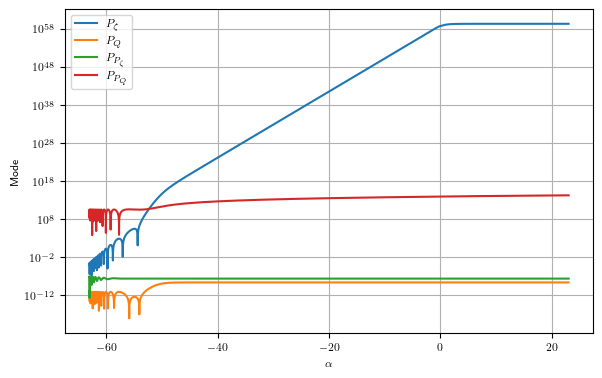

In [29]:
#test_two_fluids_wkb_mode(Nc.HIPertTwoFluidsCross.MODE1MAIN, 1, 0.0, 1.0)
test_two_fluids_wkb_mode(Nc.HIPertTwoFluidsCross.MODE1MAIN, 1, 1.0, 0.0)
#test_two_fluids_wkb_mode(Nc.HIPertTwoFluidsCross.MODE1MAIN, 1, 1.0, 1.0)


  0%|                                                                                                                                                                                                                                                    | 0/20 [00:00<?, ?it/s]
[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  1.000000000000000e+00, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



  5%|███████████▊                                                                                                                                                                                                                                | 1/20 [00:20<06:24, 20.22s/it]

23.025850929940457
# Mode 1 k  1.832980710832436e+00, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 10%|███████████████████████▌                                                                                                                                                                                                                    | 2/20 [00:39<05:49, 19.39s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  3.359818286283782e+00, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 15%|███████████████████████████████████▍                                                                                                                                                                                                        | 3/20 [00:59<05:40, 20.04s/it]

23.025850929940457
# Mode 1 k  6.158482110660263e+00, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 20%|███████████████████████████████████████████████▏                                                                                                                                                                                            | 4/20 [01:22<05:37, 21.10s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  1.128837891684689e+01, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 25%|███████████████████████████████████████████████████████████                                                                                                                                                                                 | 5/20 [01:44<05:21, 21.46s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  2.069138081114790e+01, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 30%|██████████████████████████████████████████████████████████████████████▊                                                                                                                                                                     | 6/20 [02:04<04:54, 21.02s/it]

23.025850929940457
# Mode 1 k  3.792690190732250e+01, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 35%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                         | 7/20 [02:25<04:29, 20.76s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  6.951927961775610e+01, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 40%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                             | 8/20 [02:42<03:58, 19.86s/it]

23.025850929940457
# Mode 1 k  1.274274985703134e+02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                 | 9/20 [03:02<03:36, 19.66s/it]

23.025850929940457
# Mode 1 k  2.335721469090122e+02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                     | 10/20 [03:21<03:16, 19.66s/it]

23.025850929940457
# Mode 1 k  4.281332398719396e+02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                         | 11/20 [03:39<02:50, 18.91s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  7.847599703514613e+02, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                              | 12/20 [03:56<02:26, 18.35s/it]

23.025850929940457
# Mode 1 k  1.438449888287662e+03, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 13/20 [04:13<02:06, 18.07s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  2.636650898730359e+03, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 14/20 [04:31<01:48, 18.16s/it]

23.025850929940457
# Mode 1 k  4.832930238571757e+03, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 15/20 [04:50<01:30, 18.17s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  8.858667904100823e+03, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 16/20 [05:10<01:15, 18.81s/it]

23.025850929940457
# Mode 1 k  1.623776739188722e+04, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 17/20 [05:30<00:57, 19.18s/it]

23.025850929940457
# Mode 1 k  2.976351441631321e+04, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 18/20 [05:50<00:38, 19.42s/it]

23.025850929940457
# Mode 1 k  5.455594781168517e+04, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 19/20 [06:09<00:19, 19.37s/it]

23.025850929940457
# Mode 1 k  1.000000000000000e+05, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [06:31<00:00, 19.55s/it]

23.025850929940457


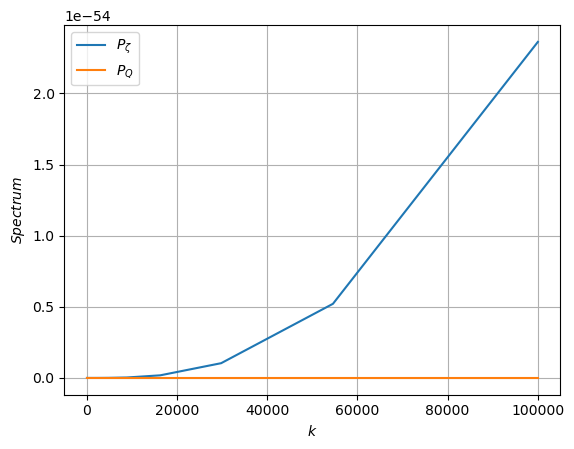

In [8]:
test_two_fluids_wkb_spec()

  0%|                                                                                                                                                                                                                                                    | 0/50 [00:00<?, ?it/s]
[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  9.999999999999997e-06, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



  2%|████▋                                                                                                                                                                                                                                       | 1/50 [00:18<15:22, 18.82s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  1.599858719606059e-05, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



  4%|█████████▍                                                                                                                                                                                                                                  | 2/50 [00:38<15:29, 19.36s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  2.559547922699535e-05, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



  6%|██████████████▏                                                                                                                                                                                                                             | 3/50 [00:58<15:26, 19.71s/it]

23.025850929940457
# Mode 1 k  4.094915062380421e-05, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



  8%|██████████████████▉                                                                                                                                                                                                                         | 4/50 [01:19<15:22, 20.06s/it]

23.025850929940457
# Mode 1 k  6.551285568595508e-05, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 10%|███████████████████████▌                                                                                                                                                                                                                    | 5/50 [01:40<15:25, 20.57s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  1.048113134154687e-04, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 12%|████████████████████████████▎                                                                                                                                                                                                               | 6/50 [02:00<14:58, 20.43s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  1.676832936811008e-04, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 14%|█████████████████████████████████                                                                                                                                                                                                           | 7/50 [02:19<14:13, 19.86s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  2.682695795279723e-04, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 16%|█████████████████████████████████████▊                                                                                                                                                                                                      | 8/50 [02:40<14:05, 20.12s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  4.291934260128778e-04, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 18%|██████████████████████████████████████████▍                                                                                                                                                                                                 | 9/50 [02:59<13:32, 19.83s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  6.866488450043001e-04, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 20%|███████████████████████████████████████████████                                                                                                                                                                                            | 10/50 [03:20<13:26, 20.17s/it]

23.025850929940457
# Mode 1 k  1.098541141987558e-03, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 22%|███████████████████████████████████████████████████▋                                                                                                                                                                                       | 11/50 [03:41<13:14, 20.37s/it]

23.025850929940457
# Mode 1 k  1.757510624854792e-03, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 24%|████████████████████████████████████████████████████████▍                                                                                                                                                                                  | 12/50 [04:00<12:37, 19.93s/it]

23.025850929940457
# Mode 1 k  2.811768697974231e-03, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 26%|█████████████████████████████████████████████████████████████                                                                                                                                                                              | 13/50 [04:19<12:05, 19.61s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  4.498432668969446e-03, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 28%|█████████████████████████████████████████████████████████████████▊                                                                                                                                                                         | 14/50 [04:37<11:36, 19.35s/it]

23.025850929940457
# Mode 1 k  7.196856730011521e-03, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 30%|██████████████████████████████████████████████████████████████████████▌                                                                                                                                                                    | 15/50 [04:56<11:13, 19.24s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  1.151395399326448e-02, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 32%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                                                               | 16/50 [05:16<10:56, 19.31s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  1.842069969326716e-02, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 34%|███████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                           | 17/50 [05:35<10:36, 19.30s/it]

23.025850929940457
# Mode 1 k  2.947051702551811e-02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 36%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                      | 18/50 [05:55<10:22, 19.46s/it]

23.025850929940457
# Mode 1 k  4.714866363457395e-02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 38%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                 | 19/50 [06:14<10:03, 19.47s/it]

23.025850929940457
# Mode 1 k  7.543120063354626e-02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 40%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                             | 20/50 [06:33<09:41, 19.37s/it]

23.025850929940457
# Mode 1 k  1.206792640639329e-01, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 42%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                        | 21/50 [06:53<09:23, 19.41s/it]

23.025850929940457
# Mode 1 k  1.930697728883249e-01, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 44%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                   | 22/50 [07:15<09:22, 20.08s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  3.088843596477482e-01, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 46%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                               | 23/50 [07:34<08:54, 19.81s/it]

23.025850929940457
# Mode 1 k  4.941713361323841e-01, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 48%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                          | 24/50 [07:54<08:40, 20.02s/it]

23.025850929940457
# Mode 1 k  7.906043210907703e-01, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                     | 25/50 [08:14<08:19, 19.98s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  1.264855216855296e+00, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                | 26/50 [08:32<07:45, 19.42s/it]

23.025850929940457
# Mode 1 k  2.023589647725158e+00, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                            | 27/50 [08:51<07:23, 19.29s/it]

23.025850929940457
# Mode 1 k  3.237457542817649e+00, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 28/50 [09:10<06:57, 18.99s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  5.179474679231214e+00, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                  | 29/50 [09:30<06:44, 19.28s/it]

23.025850929940457
# Mode 1 k  8.286427728546842e+00, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                              | 30/50 [09:49<06:28, 19.41s/it]

23.025850929940457
# Mode 1 k  1.325711365590110e+01, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 31/50 [10:08<06:05, 19.24s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  2.120950887920194e+01, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 32/50 [10:28<05:51, 19.51s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  3.393221771895331e+01, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                | 33/50 [10:48<05:33, 19.61s/it]

23.025850929940457
# Mode 1 k  5.428675439323859e+01, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 34/50 [11:08<05:12, 19.56s/it]

23.025850929940457
# Mode 1 k  8.685113737513532e+01, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 35/50 [11:29<05:02, 20.18s/it]

23.025850929940457
# Mode 1 k  1.389495494373140e+02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 36/50 [11:49<04:41, 20.08s/it]

23.025850929940457
# Mode 1 k  2.222996482526196e+02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 37/50 [12:09<04:22, 20.19s/it]

23.025850929940457
# Mode 1 k  3.556480306223128e+02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 38/50 [12:30<04:01, 20.16s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  5.689866029018311e+02, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 39/50 [12:48<03:37, 19.73s/it]

23.025850929940457
# Mode 1 k  9.102981779915234e+02, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 40/50 [13:09<03:18, 19.88s/it]

23.025850929940457
# Mode 1 k  1.456348477501245e+03, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 41/50 [13:30<03:02, 20.25s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  2.329951810515372e+03, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 42/50 [13:49<02:39, 20.00s/it]

23.025850929940457
# Mode 1 k  3.727593720314937e+03, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 43/50 [14:11<02:23, 20.47s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  5.963623316594654e+03, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 44/50 [14:30<02:01, 20.20s/it]

23.025850929940457
# Mode 1 k  9.540954763499949e+03, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 45/50 [14:52<01:42, 20.58s/it]

23.025850929940457
# Mode 1 k  1.526417967175234e+04, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 46/50 [15:11<01:20, 20.08s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  2.442053094548658e+04, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 47/50 [15:29<00:58, 19.57s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  3.906939937054624e+04, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 48/50 [15:48<00:38, 19.37s/it]

23.025850929940457

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1

# Mode 1 k  6.250551925273980e+04, state module 1.000000



[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 49/50 [16:09<00:19, 19.98s/it]

23.025850929940457
# Mode 1 k  1.000000000000000e+05, state module 1.000000

SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1




[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.


[ARKLS ERROR]  arkLSSetJacFn
  Integrator memory is NULL.




SUNDIALS_ERROR: ARKodeSetJacFn() failed with flag = -1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [16:29<00:00, 19.78s/it]

23.025850929940457


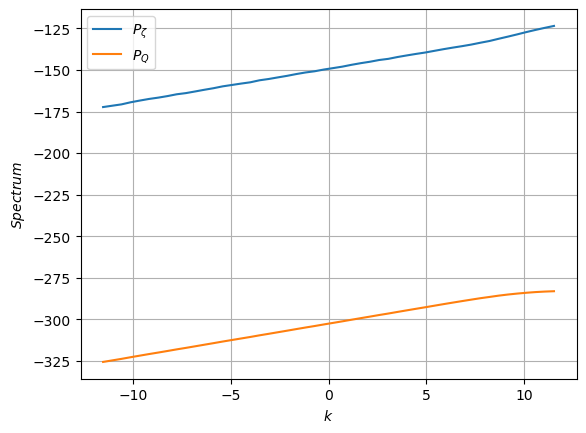

(array([-172.29336504, -171.47725159, -170.67740675, -169.40963547,
        -168.3753366 , -167.40418261, -166.617099  , -165.69081201,
        -164.60277739, -163.8977755 , -162.91261604, -161.89532066,
        -160.95146111, -159.82933117, -158.99936059, -158.1648807 ,
        -157.3978438 , -156.18665031, -155.4043561 , -154.44173584,
        -153.5056154 , -152.43139744, -151.48454113, -150.74967245,
        -149.71138271, -148.85570926, -147.97343268, -146.87265029,
        -145.89153898, -145.029969  , -143.98543597, -143.28854835,
        -142.18761254, -141.23608627, -140.32638846, -139.48824811,
        -138.47120016, -137.4639825 , -136.53337746, -135.66450856,
        -134.71280034, -133.5931724 , -132.540295  , -131.19474152,
        -129.90695834, -128.57067396, -127.17615592, -125.87341712,
        -124.6418451 , -123.48007829]),
 [9.999999999999997e-06,
  1.5998587196060593e-05,
  2.5595479226995355e-05,
  4.094915062380421e-05,
  6.551285568595508e-05,
  0.0001048113134

In [9]:
test_two_fluids_wkb_spec_log()

In [14]:
z1 = [-172.29336504, -171.47725159, -170.67740675, -169.40963547,
        -168.3753366 , -167.40418261, -166.617099  , -165.69081201,
        -164.60277739, -163.8977755 , -162.91261604, -161.89532066,
        -160.95146111, -159.82933117, -158.99936059, -158.1648807 ,
        -157.3978438 , -156.18665031, -155.4043561 , -154.44173584,
        -153.5056154 , -152.43139744, -151.48454113, -150.74967245,
        -149.71138271, -148.85570926, -147.97343268, -146.87265029,
        -145.89153898, -145.029969  , -143.98543597, -143.28854835,
        -142.18761254, -141.23608627, -140.32638846, -139.48824811,
        -138.47120016, -137.4639825 , -136.53337746, -135.66450856,
        -134.71280034, -133.5931724 , -132.540295  , -131.19474152,
        -129.90695834, -128.57067396, -127.17615592, -125.87341712,
        -124.6418451 , -123.48007829]

lnki = math.log(1.0e-5)# P5 intervalo de momento de interesse
lnkf = math.log(1.0e5)
lnk_a = np.linspace(lnki, lnkf, 50)
result=np.polyfit(lnk_a[:30], z1[:30], 1)

In [15]:
print(result)

[   2.00007129 -149.23919541]


In [16]:
ns = result[0] + 1
print(ns)

3.0000712909085103


In [17]:
12*1/3/(1+3*1/3) + 1

3.0